In [143]:
# Подкючаем нужны нам библиотеки
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np


# Загрузка данных, считываем датасет для работы с ним
spot_df = pd.read_csv('/kaggle/input/musicss/dataset.csv')

In [144]:
#Dropout - это техника регуляризации, которая помогает предотвратить переобучение нейронной сети. Вот основные причины его применения:

# 1) Предотвращает переобучение: Dropout случайным образом отключает некоторые нейроны во время обучения, что заставляет сеть учиться 
#более общим представлениям данных.

# 2) Улучшает обобщающую способность: Сеть становится менее зависимой от отдельных нейронов и учится работать с различными комбинациями 
#активированных нейронов.

# 3) Эффективно работает как ансамбль моделей: При каждой эпохе обучения создается "новая" модель, что эквивалентно усреднению 
#множества моделей.
spot_df.isnull().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [145]:
t=0
for artists in spot_df['artists']:
    t=t+1
    if not isinstance(artists,str):
        print(artists,t)
spot_df.iloc[65900]

nan 65901


Unnamed: 0                           65900
track_id            1kR4gIb7nGxHPI3D2ifs59
artists                                NaN
album_name                             NaN
track_name                             NaN
popularity                               0
duration_ms                              0
explicit                             False
danceability                         0.501
energy                               0.583
key                                      7
loudness                             -9.46
mode                                     0
speechiness                         0.0605
acousticness                          0.69
instrumentalness                   0.00396
liveness                            0.0747
valence                              0.734
tempo                              138.391
time_signature                           4
track_genre                          k-pop
Name: 65900, dtype: object

In [146]:
spot_df = spot_df.dropna()
spot_df.isnull().sum()

Unnamed: 0          0
track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [147]:
spot_df

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [148]:
# track_id: идентификатор Spotify для трека.
# artists: Имена художников
# album_name: Название альбома.
# track_name: Название трека
# popularity: Оценка популярности от 0 до 100.
# duration_ms: длина трека в миллисекундах.
# explicit: есть ли в треке откровенные тексты.
# danceability, energy, key, loudness, mode, speechiness, 
# acousticness, instrumentalness, liveness, valence, tempo, 
# time_signature: различные музыкальные и вокальные характеристики.
# track_genre: Жанр трека.
# danceability: Danceability описывает, насколько трек подходит для танцев, основываясь на сочетании музыкальных элементов, включая темп, стабильность ритма, силу удара и общую регулярность. Значение 0.0 обозначает наименьшую танцабельность, а 1.0 - наибольшую.
# energy. Энергия - это мера от 0.0 до 1.0 и представляет собой воспринимаемую меру интенсивности и активности. Обычно энергичные треки звучат быстро, громко и шумно. Например, дэт-метал имеет высокую энергетику, в то время как прелюдии Баха оцениваются низко по этой шкале.
# key: Ключ, в котором находится трек. Целые числа соответствуют нотам, используя стандартную нотацию Pitch Class. Пример: 0 = С, 1 = C#/ДЬ, 2 = D и т.д. Если ключ не был определен, значение равно -1.
# loudness: Общая громкость трека в децибелах (dB)
# mode: Режим показывает модальность (мажор или минор) трека, тип шкалы, из которой взято его мелодическое содержание. Мажор обозначается 1, а минор - 0.
# speechiness: Speechiness определяет наличие произнесённых слов в треке. Чем более «речевым» является запись (например, ток-шоу, аудиокнига, поэзия), тем ближе значение атрибута к 1.0. Значения выше 0.66 описывают треки, которые, вероятно, состоят полностью из произнесённых слов. Значения между 0.33 и 0.66 описывают треки, которые могут содержать как музыку, так и речь, как в секциях, так и в слоях, включая такие случаи, как рэп. Значения ниже 0.33 скорее всего представляют музыку и Другие не речевые треки.
# acousticness: Мера уверенности от 0.0 до 1.0 в том, что трек является акустическим. 1.0 представляет собой высокую уверенность в том, что трек акустический.
# instrumentalness: Прогнозирует, содержит ли трек вокал. Звуки "Ооһ" и "ааһ" рассматриваются как инструментальные в этом контексте. Рэп или треки с произносимыми словами явно являются "вокальными". 


[Text(0.5, 1.0, 'Зависимость популярности песни от её громкости')]

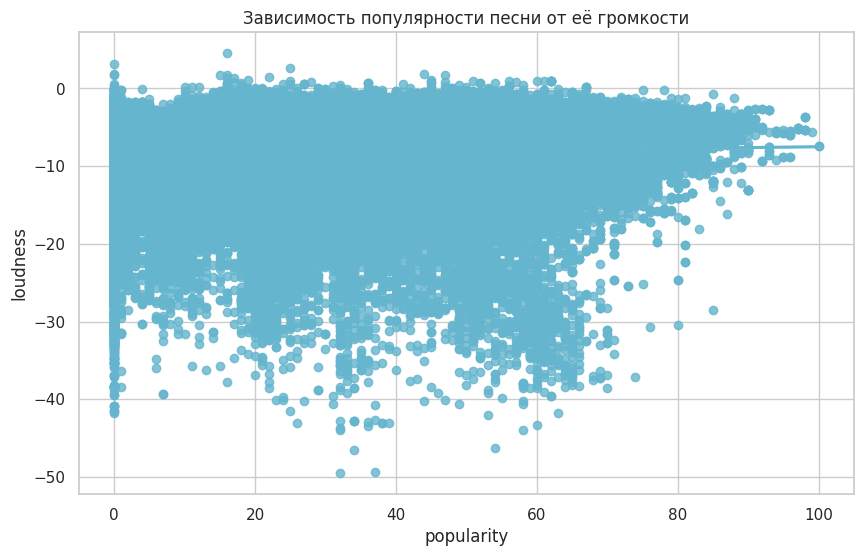

In [149]:
# Зависимость популярности песни от её громкости
plt.figure(figsize=(10,6))
sns.regplot(data=spot_df, y='loudness', x='popularity', color='c').set(title='Зависимость популярности песни от её громкости')

[Text(0.5, 1.0, 'Зависимость популярности песни от её продолжительности')]

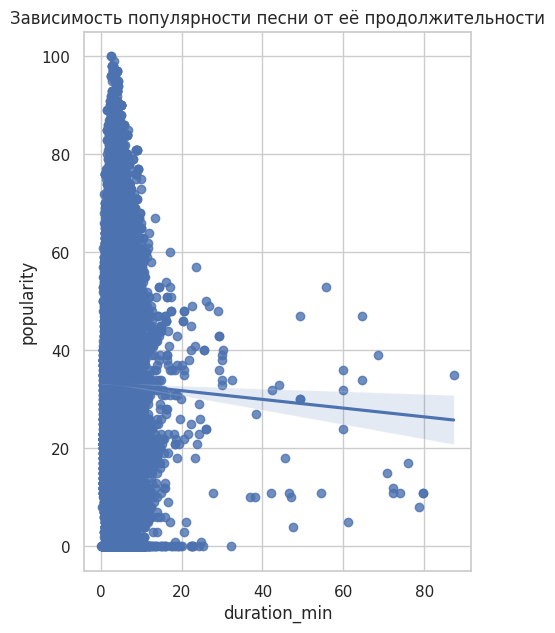

In [150]:
# spot_df['explicit'] = spot_df['explicit'].map({'False': 0, 'True': 1})
# Зависимость популярности песни от её продолжительности
spot_df['duration_min'] = spot_df['duration_ms'] / 60000
plt.figure(figsize=(5,7))
sns.regplot(data=spot_df, y='popularity', x='duration_min').set(title='Зависимость популярности песни от её продолжительности')


In [151]:
spot_df

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_min
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic,3.844433
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic,2.493500
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic,3.513767
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic,3.365550
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic,3.314217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music,6.416650
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music,6.416667
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music,4.524433
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music,4.731550


In [152]:

#plt.figure(figsize=(8, 6))
#sns.histplot(data=spot_df, x='track_genre', hue='popularity', multiple='stack', bins=20)
#plt.title('Распределение по жанру')
#plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


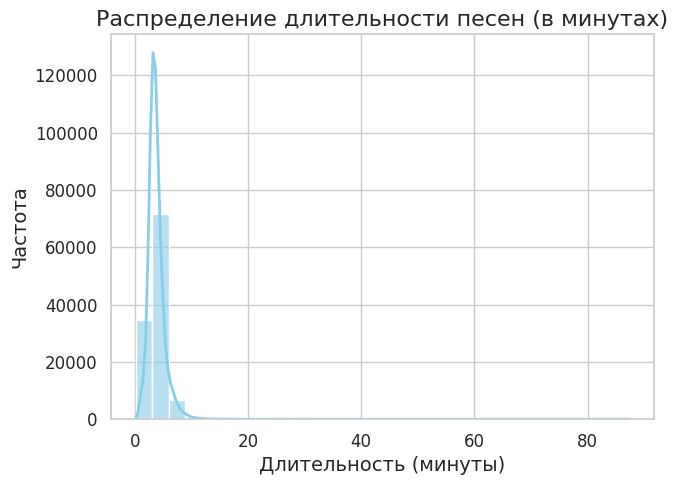

In [153]:

# Выберите стиль графика sns.set_theme (style="whitegrid")
# Установка размера графика
plt.figure(figsize=(7, 5))
# Построение гистограммы для отображения распределения длительности песен (в минутах)
#'data['duration_ms'] / 60000' переводит длительность из миллисекунд в минуты.
# bins=30 задает количество интервалов (бинов) на гистограмме, что управляет детализацией распределения.
# kde=True добавляет линию плотности, показывая непрерывное распределение данных.
# color="skyblue" задает цвет для заполненной области гистограммы.
# line_kws={} используется для настройки параметров линии KDE: 'color': 'red' задает цвет линии,
# 'lw': 2 - ширину линии.
# alpha=0.6 задает прозрачность области гистограммы, чтобы лучше видеть пересечения.
sns.histplot(spot_df['duration_ms'] / 60000, bins=30, kde=True, color="skyblue",
line_kws={'color': 'red', 'lw': 2}, alpha=0.6)
# Настройка заголовка и меток
plt.title("Распределение длительности песен (в минутах)", fontsize=16)
plt.xlabel('Длительность (минуты)', fontsize=14)
plt.ylabel("Частота", fontsize=14)

# Увеличение шрифта для меток осей
plt.tick_params(axis='both', which='major', labelsize=12)
# Показать график
plt.show()


In [154]:
sns.set_style(style='darkgrid')
plt.figure(figsize=(10,5))
popular = genre.sort_values('popularity', ascending=False).head(10)
sns.barplot(y = 'track_genre', x = 'popularity', spot_df = popular).set(title='Top 5 Genres by Popularity')

NameError: name 'genre' is not defined

<Figure size 1000x500 with 0 Axes>

In [ ]:
sns.displot(data=spot_df,
            x='tempo',
            kind='hist',
            bins=np.arange(0,210, 10))


In [ ]:
sns.set_style(style='darkgrid')
plt.figure(figsize=(10,5))
popular = track_genre.sort_values('popularity', ascending=False).head(10)
sns.barplot(y = 'track_genre', x = 'popularity', spot_df = popular).set(title='Top 5 Genres by Popularity')

In [ ]:

# Используем value_counts() для подсчета количества треков в каждом жанре
# Метод value_counts() создает частотную таблицу, подсчитывая количество треков # для каждого уникального значения в столбце 'track_genre'.
top_genres = spot_df['track_genre'].value_counts().head(10).index
# Фильтруем данные, оставляя только треки из топ-10 жанров 
filtered_data = spot_df[spot_df['track_genre'].isin(top_genres)]
# Устанавливаем стиль графика 
sns.set_theme(style="whitegrid")
# Устанавливаем размер графика 
plt.figure(figsize=(7, 6))

sns.boxplot(data=filtered_data, x='track_genre', y='popularity', hue='track_genre', palette="pastel", linewidth=1.5)
# Настройка заголовка и меток
plt.title('Популярность топ-10 жанров', fontsize=18)
plt.xlabel('Жанры', fontsize=14)
plt.ylabel('Популярность', fontsize=14)
# Увеличиваем шрифт для меток по оси Х и выставляем текст вертикально
plt.xticks(rotation=90, fontsize=12)
# Добавление сетки для улучшения восприятия
# plt.grid() добавляет сетку на график, а axis='y', linestyle='--', linewidth=0.5 позволяет настроить # линию сетки по оси У.
plt.grid(axise='y', linestyle='--', linewidth=0.5)
# Увеличиваем шрифт для меток оси у
plt.tick_params(axis='y', labelsize=12)
# Показать график 
plt.tight_layout() 
plt.show()

In [ ]:
spot_df

In [ ]:
cm = spot_df.drop(['key','mode','explicit'], axis=1).corr(method = 'pearson')
plt.figure(figsize=(14,6))
map = sns.heatmap(cm, annot = True, fmt = '.1g', vmin=-1, vmax=1, center=0, cmap='inferno', linewidths=1, linecolor='Black')
map.set_title('Correlation Heatmap between Variable')
map.set_xticklabels(map.get_xticklabels(), rotation=90)

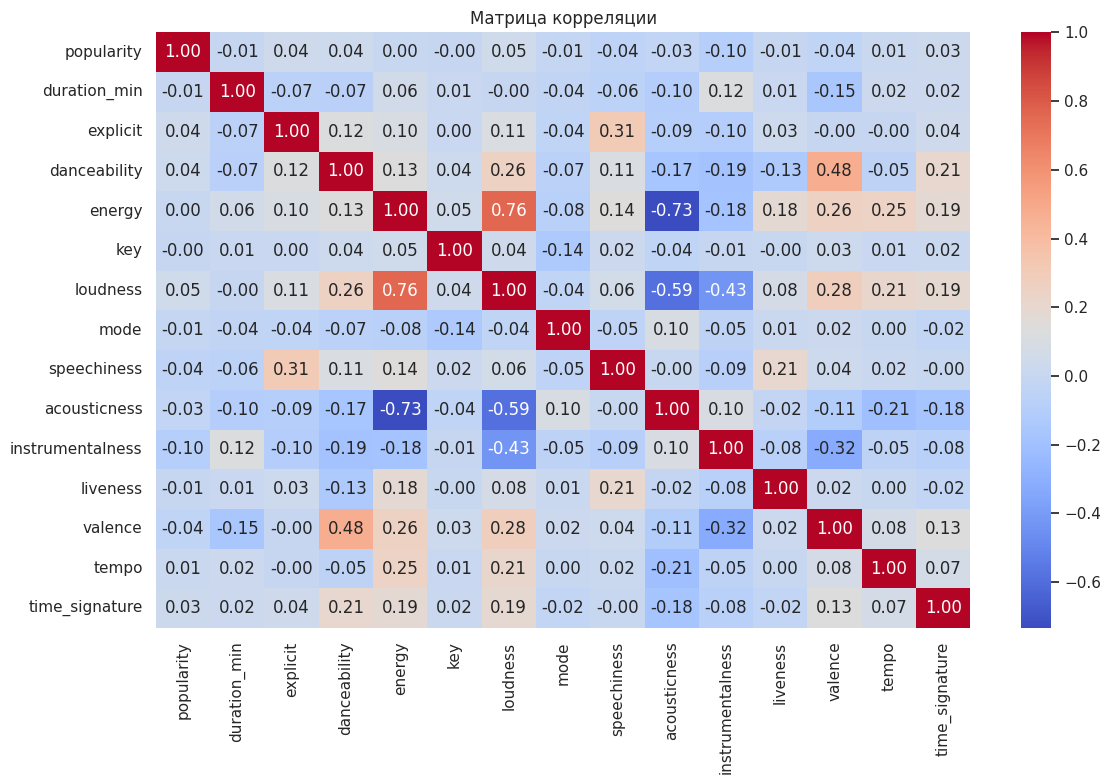

In [157]:

#Для анализа сначала стоит посмотреть на матрицу корреляции. Она будет представлена в виде тепловой карты.
#Так как мы уже закодировали колонки, в которых есть строки, то будем считать корреляцию между теми колонками, которые не кодировались. Параметры для heatmap:

# fmt - формат надписей в ячейках. .2f означает, что после запятой будут идти 2 цифры.
# annot - добавляет значения в ячейки при True
# стар - устанавливает цветовую схему.
# ах - устанавливает оси для тепловой карты.
# Датафрейм с незакодированными строками
corr_data = spot_df.loc[:, ['popularity', 'duration_min', 'explicit', 'danceability', 'energy', 'key', 'loudness',
'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
'valence', 'tempo', 'time_signature']]
# Построение тепловой карты корреляции
corr_data_1 = corr_data.corr()
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(data=corr_data_1, fmt='.2f', annot=True, cmap='coolwarm', ax=ax)
plt.title('Матрица корреляции')
plt.tight_layout()
plt.show()


In [156]:
from copy import copy
# копируем начальный датасет
temp_data = copy(spot_df)
# Разделяем артистов
temp_data['artists'] = temp_data['artists'].str.split(';')
data_exploded = temp_data.explode('artists')
# Находим сумму популярности для каждого артиста

art_pop = data_exploded.groupby('artists')['popularity'].sum().reset_index()
# Находим количество треков у каждого артиста.
art_count = data_exploded['artists'].value_counts().reset_index()
# Формируем итоговый датасет.
art_pop_count = pd.merge(art_pop, art_count, on='artists')
art_pop_count['avg_popularity'] = art_pop_count['popularity']/ art_pop_count['count']
art_pop_count = art_pop_count.sort_values('avg_popularity', ascending=False).reset_index(drop=True)


In [ ]:
top_5_artists = art_pop_count.head()
top_5_artists

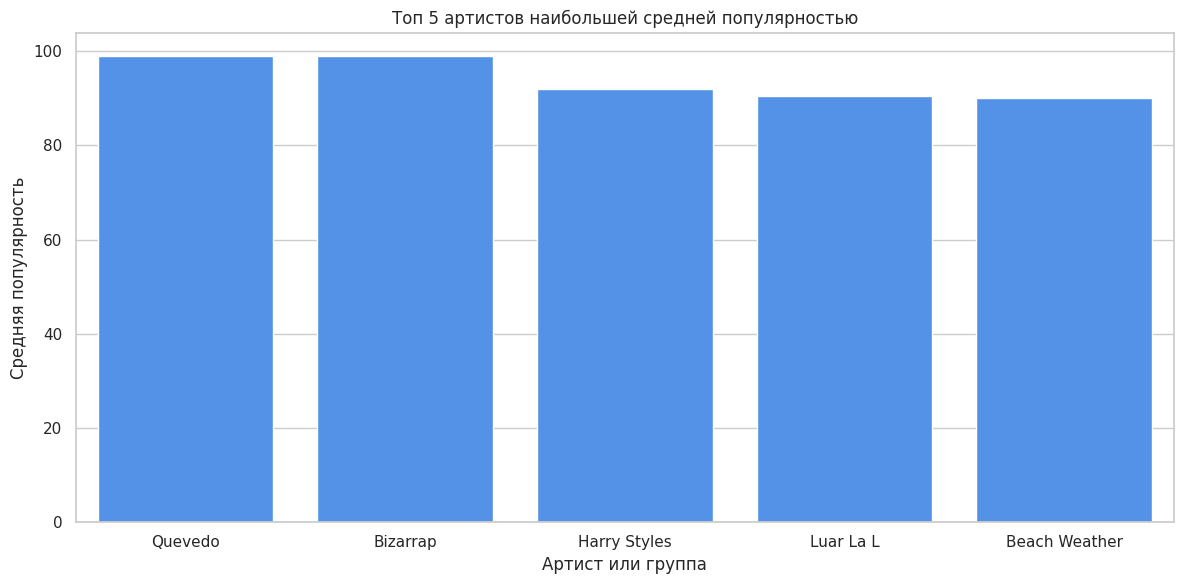

In [155]:

plt.figure(figsize=(12, 6)), sns.set_style('whitegrid')
sns.barplot(x=top_5_artists['artists'], y=top_5_artists['avg_popularity'], color='#3c8eff', orient='v')
plt.title('Топ 5 артистов наибольшей средней популярностью')
plt.xlabel('Артист или группа')
plt.ylabel('Средняя популярность')
plt.tight_layout()
plt.show()